<a href="https://colab.research.google.com/github/valentinmakarov/makarovvalentin/blob/main/4hw_makarov_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Курс "Компьютерная лингвистика" | НИУ ВШЭ Санкт-Петербург 2024 (c) В.И. Фирсанова`

# Нейросетевой машинный перевод: подготовка данных к машинному обучению

## Домашнее задание

Задание:

1. **По желанию**

* Ознакомиться с [туториалом TensorFlow](https://www.tensorflow.org/text/tutorials/nmt_with_attention) по машинному переводу

* Адаптировать препроцессинг на основе этого воркбука и обучить модель из туториала TensorFlow на данных `toy_data.ru` и `toy_data.en`

2. **Обязательно**

* Ниже: образец подсчета BLEU-Score для системы машинного перевода. Вспомните, как считается BLEU и опишите своими словами форумулу расчета и интерпретацию результатов. Ответьте на следующие вопросы:

  * Что значит кандидат и референс?
  * Для чего подойдет BLEU-Score: подсчета отдельных переводов или результатов работы системы на целом корпусе?
  * Какие "скоры" считаются высокими, а какие - низкими?
  
* Проанализируйте результаты в ячейках ниже. Порассуждайте:

  * На ваш взгляд, какие слова, контексты вызвали трудности у автоматической системы?
  * Руководствуясь знаниями о том, как работают нейросети, предположите, что вызвало ошибки.

**BLEU-score** основан на подсчете слов и словосочетаний из машинного перевода, которые совпадают с эталонным переводом. Это число делится на общее количество слов и словосочетаний в машинном переводе, считается *precision*. К этой точности еще применяется штраф за краткость (*brevity penalty*), чтобы машинный перевод не был слишком кратким и при этом имел несколько совпадающих слов.

**Кандидат** - наш машинный перевод

**Референс** - эталонный вариант, с которым кандидат сравнивается.


BLEU-score имеет диапазон **от 0 до 1** (чем ближе к 1, тем лучше перевод), но даже отличный перевод человека не получает 1! Поэтому существует распределение, благодаря которому грамотнее можно интерпретировать результат:

Таким образом, переводы, BLEU-score которых больше 40, можно считать качественными


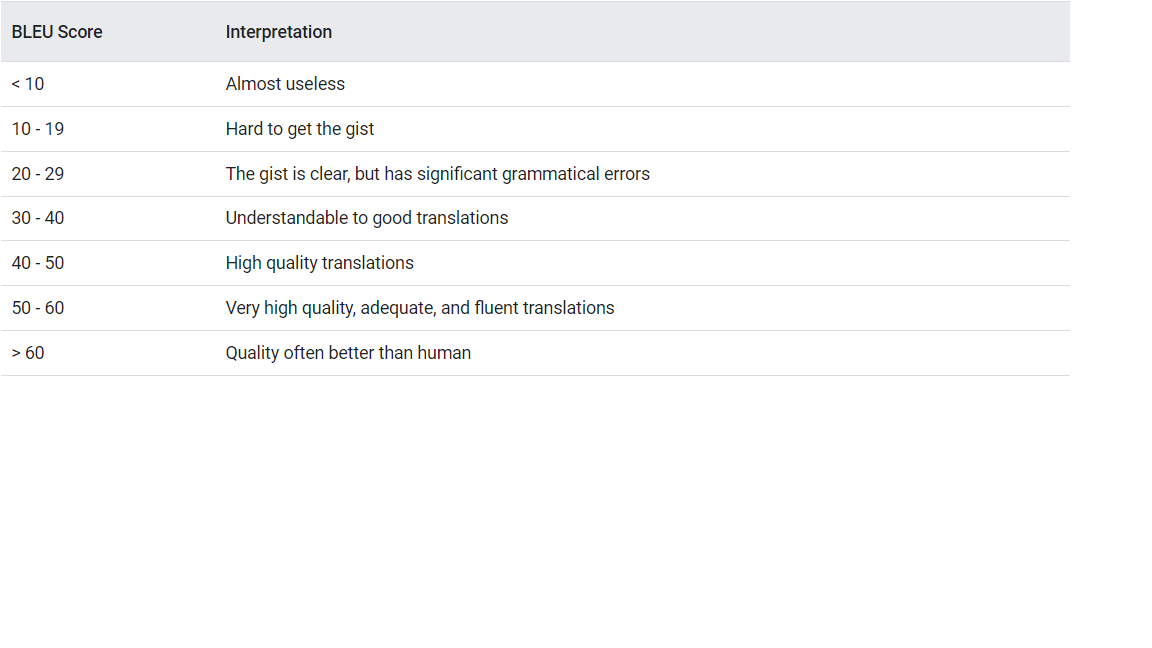


In [ ]:
!pip install evaluate

In [ ]:
import evaluate

predictions = [
    "In addition to the usual hockey, there is an underwater and even ice version of this game.", #  Помимо обычного хоккея, существует подводная и даже подлёдная разновидности этой игры.
    "You reap what you sow.", # Что посеешь - то и пожнешь.
    "Also, justice is how we distribute the small resources." # Также, справедливость - это и то, как мы распределяем малые ресурсы.
    ]

references = [
    ["In addition to conventional hockey, there is an underwater and even under-ice variety of this game."], #  Помимо обычного хоккея, существует подводная и даже подлёдная разновидности этой игры.
    ["What goes around comes around."], # Что посеешь - то и пожнешь.
    ["Fairness also has to do with how we distribute scarce resources."], # Также, справедливость - это и то, как мы распределяем малые ресурсы.
    ]

bleu = evaluate.load("bleu")
results = bleu.compute(predictions=predictions, references=references)

print(results)

{'bleu': 0.374360558192794, 'precisions': [0.5833333333333334, 0.45454545454545453, 0.3333333333333333, 0.2222222222222222], 'brevity_penalty': 1.0, 'length_ratio': 1.0, 'translation_length': 36, 'reference_length': 36}


В нашем случае **BLEU-score ~ 0,37 (37%)**, поэтому перевод можно считать неплохим, наш машинный перевод является довольно понятным и улавливающим суть.

Трудности нашей системы: *идиомы* (What goes around comes around)
и слова, имеющие *сходное значение*:

**обычный хоккей:** *usual* более простое и более употребимое слово, чем его синоним *conventional*

**справедливость:** оба слова - синонимы

**малые ресурсы:** *scarce* употребляется реже, а также является более сложным словом, чем его синоним в данном значении *small*

**подлёдный:** идей, почему именно ice вместо under-ice, если честно нет.

